
# Image Classification with CNN


Welcome to second assignment of Deep learning lesson. Follow the instructions and complete the assignment.

------------

## Task

**Build an image classifier with Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot
    
 

In [50]:
classes=["T-shirt/top", "Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [51]:
import os
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D
from sklearn.model_selection import train_test_split
from keras import optimizers
from keras.preprocessing import image
import matplotlib.pyplot as plt
from matplotlib.image import imread

## The Data

**Download the fashion mnist dataset using Keras.**

In [52]:
from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()


## Visualizing the Data

**Using matplotlib show an any image from the data set.**

In [53]:
x_train.shape

(60000, 28, 28)

In [54]:
img=(x_train[59])

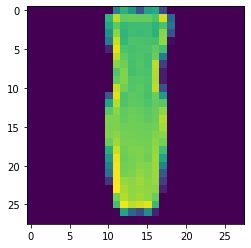

In [55]:
plt.imshow(img)

In [56]:
y_train.shape

(60000,)

In [57]:
y_test.shape

(10000,)

In [58]:
x_test.shape

(10000, 28, 28)

In [59]:
img_xt=(x_test[11])

In [60]:
img_xt.shape

(28, 28)

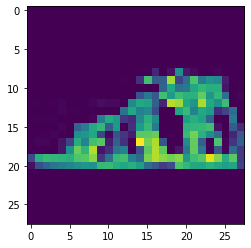

In [61]:
plt.imshow(img_xt)

## Preprocessing the Data

**Normalize the X train and X test using max value of the image arrays.**

In [62]:
np.min(x_train)

0

In [63]:
np.max(x_train)

255

In [64]:
np.min(x_test)

0

In [65]:
np.max(x_test)

255

In [66]:
x_train = x_train/255

In [67]:
x_test = x_test/255

**Reshape the X into 4 dimension**

In [68]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
print("Shape: ", x_train[0].shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)
Shape:  (28, 28)


In [69]:
x_train = x_train.reshape(x_train.shape[0],28,28,1)

In [70]:
x_train.shape

(60000, 28, 28, 1)

In [73]:
x_test = x_test.reshape(x_test.shape[0],28,28,1)

In [74]:
x_test.shape

(10000, 28, 28, 1)

**Convert the y_train and y_test values to be one-hot encoded for categorical analysis.**

In [75]:
from tensorflow.keras.utils import to_categorical

In [76]:
index = 128
print(y_train[index])
print(y_train[index].shape)

4
()


In [77]:
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

print(y_train_cat[index])
print(y_train_cat[index].shape)

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
(10,)


## Building the Model

**Create the model**

* 2D Convolutional Layer, filters=28 and kernel_size=(3,3)
* Pooling Layer where pool_size = (2,2) strides=(1,1)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [78]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D

In [80]:
model = Sequential()

model.add(Conv2D(filters=28, kernel_size=(3,3),input_shape=(28, 28, 1), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(1,1)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=(28, 28, 1), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(1,1)))


model.add(Flatten())


model.add(Dense(128))
model.add(Activation('relu'))

model.add(Dropout(0.5))

model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

###  Model Training 

**Train the model with arbitrary amount of epochs.**

In [81]:
model.fit(x_train, y = y_train_cat, validation_data=(x_test,y_test_cat), batch_size = 32, epochs = 10, verbose = 1)


Epoch 1/10
1875/1875 [==============================] - 308s 162ms/step - loss: 0.4515 - accuracy: 0.8424 - val_loss: 0.3297 - val_accuracy: 0.8894
Epoch 2/10
1875/1875 [==============================] - 301s 161ms/step - loss: 0.3361 - accuracy: 0.8861 - val_loss: 0.3274 - val_accuracy: 0.8886
Epoch 3/10
1875/1875 [==============================] - 307s 164ms/step - loss: 0.3341 - accuracy: 0.8892 - val_loss: 0.3411 - val_accuracy: 0.8878
Epoch 4/10
1875/1875 [==============================] - 297s 158ms/step - loss: 0.3435 - accuracy: 0.8877 - val_loss: 0.3239 - val_accuracy: 0.8908
Epoch 5/10
1875/1875 [==============================] - 288s 154ms/step - loss: 0.3530 - accuracy: 0.8851 - val_loss: 0.3398 - val_accuracy: 0.8793
Epoch 6/10
1875/1875 [==============================] - 287s 153ms/step - loss: 0.3646 - accuracy: 0.8835 - val_loss: 0.3610 - val_accuracy: 0.8834
Epoch 7/10
1875/1875 [==============================] - 287s 153ms/step - loss: 0.3732 - accuracy: 0.8817 - val_

**Plot values of metrics you used in your model.**

In [82]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.451485,0.842400,0.329718,0.8894
1,0.336103,0.886067,0.327360,0.8886
2,0.334142,0.889200,0.341130,0.8878
3,0.343502,0.887650,0.323911,0.8908
4,0.353000,0.885100,0.339799,0.8793


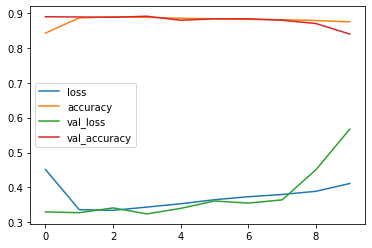

In [83]:
loss_df.plot();

**Train the model using earlystop.**

In [84]:
from tensorflow.keras.callbacks import EarlyStopping

In [85]:
early_stop = EarlyStopping(monitor = "val_accuracy", patience = 5)

In [87]:
model.fit(x_train, y = y_train_cat, validation_data=(x_test,y_test_cat), batch_size = 32, epochs = 10, verbose = 1,  callbacks = [early_stop])


Epoch 1/10
1875/1875 [==============================] - 302s 161ms/step - loss: 0.4188 - accuracy: 0.8717 - val_loss: 0.4084 - val_accuracy: 0.8844
Epoch 2/10
1875/1875 [==============================] - 309s 165ms/step - loss: 0.4165 - accuracy: 0.8720 - val_loss: 0.3916 - val_accuracy: 0.8659
Epoch 3/10
1875/1875 [==============================] - 340s 181ms/step - loss: 0.4232 - accuracy: 0.8705 - val_loss: 0.5690 - val_accuracy: 0.8292
Epoch 4/10
1875/1875 [==============================] - 330s 176ms/step - loss: 0.4461 - accuracy: 0.8685 - val_loss: 0.4026 - val_accuracy: 0.8773
Epoch 5/10
1875/1875 [==============================] - 314s 167ms/step - loss: 0.4541 - accuracy: 0.8668 - val_loss: 0.4308 - val_accuracy: 0.8795
Epoch 6/10
1875/1875 [==============================] - 295s 158ms/step - loss: 0.4535 - accuracy: 0.8662 - val_loss: 0.3846 - val_accuracy: 0.8749


**Plot values of metrics you used in your model.**

In [88]:
loss_early_df = pd.DataFrame(model.history.history)
loss_early_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.418773,0.871683,0.408436,0.8844
1,0.416515,0.872017,0.391573,0.8659
2,0.423211,0.870450,0.569037,0.8292
3,0.446120,0.868533,0.402647,0.8773
4,0.454103,0.866817,0.430849,0.8795


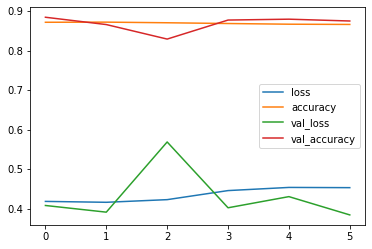

In [89]:
loss_early_df.plot();

### Model Evaluation

**Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set.**

In [90]:
model.metrics_names

['loss', 'accuracy']

In [91]:
model.evaluate(x_test,y_test_cat)

313/313 [==============================] - 12s 37ms/step - loss: 0.3846 - accuracy: 0.8749


[0.3845980763435364, 0.8748999834060669]

In [93]:
from sklearn.metrics import classification_report

In [94]:
predictions = model.predict(x_test)
predictions

array([[3.0978768e-17, 1.4298505e-16, 3.9330903e-17, ..., 9.2411489e-07,
        1.6455560e-09, 9.9997306e-01],
       [7.4938398e-05, 4.2570465e-12, 9.9300176e-01, ..., 6.8423094e-13,
        8.3938306e-07, 1.0138562e-12],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [3.0939661e-11, 2.4958099e-27, 3.0481730e-18, ..., 6.4382444e-21,
        1.0000000e+00, 1.9383967e-23],
       [5.8622522e-06, 9.9582338e-01, 7.8322895e-09, ..., 7.6035747e-20,
        3.9522380e-08, 6.0546487e-15],
       [2.8872153e-06, 1.8863671e-05, 2.5031330e-05, ..., 3.4522690e-02,
        2.2785755e-02, 3.6646682e-03]], dtype=float32)

In [95]:
pred=np.argmax(predictions,axis=1)
pred

array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

In [97]:
y_test_cat.shape

(10000, 10)

In [98]:
y_test_cat[10]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

In [99]:
np.argmax(predictions[10])

4

In [100]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [30]:
print(classification_report(y_test,pred))

             precision    recall  f1-score   support

          0       0.86      0.85      0.85      1000
          1       0.99      0.97      0.98      1000
          2       0.88      0.83      0.85      1000
          3       0.91      0.91      0.91      1000
          4       0.83      0.88      0.85      1000
          5       0.97      0.98      0.98      1000
          6       0.73      0.76      0.74      1000
          7       0.95      0.97      0.96      1000
          8       0.99      0.97      0.98      1000
          9       0.98      0.94      0.96      1000

avg / total       0.91      0.91      0.91     10000



In [101]:
classes[4]

'Coat'

# Prediction

In [119]:
samples=[x_test[0]]

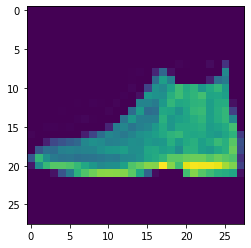

In [120]:
plt.imshow(samples[0])

In [121]:
img=samples[0]
img.shape

(28, 28, 1)

In [122]:
resized_img=np.expand_dims(img, axis=0)
resized_img.shape

(1, 28, 28, 1)

In [123]:
model.predict(resized_img)

array([[3.0978887e-17, 1.4298669e-16, 3.9330903e-17, 2.9558019e-16,
        4.0282526e-16, 2.6025620e-05, 6.1556050e-16, 9.2411574e-07,
        1.6455528e-09, 9.9997306e-01]], dtype=float32)

In [124]:
np.argmax(model.predict(resized_img))

9

In [126]:
classes[9]

'Ankle boot'

# End of Assignment